In [1]:
setwd("..")

In [2]:
# change default figure size
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res = 300)
# disable scientific notation (for plot axes)
options(scipen = 999)

In [4]:
library(dplyr)
library(readr)
library(tidyr)
library(purrr)
library(broom)
library(ggplot2)
library(ggpubr)
source("~/github/2022-microberna/scripts/utils.R")

## Obtain and read in GTDB rs207 metadata

In [5]:
destfile <- "inputs/gtdb-rs207/bac120_metadata_rs207.tar.gz"
url <- "https://data.gtdb.ecogenomic.org/releases/release207/207.0/bac120_metadata_r207.tar.gz"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}
outfile <- "inputs/gtdb-rs207/bac120_metadata_r207.tsv"
if (!file.exists(outfile)){
  untar(destfile, exdir = "inputs/gtdb-rs207")
}

destfile <- "inputs/gtdb-rs207/ar53_metadata_rs207.tar.gz"
url <- "https://data.gtdb.ecogenomic.org/releases/release207/207.0/ar53_metadata_r207.tar.gz"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}
outfile <- "inputs/gtdb-r207/ar53_metadata_r207.tsv"
if (!file.exists(outfile)){
  untar(destfile, exdir = "inputs/gtdb-rs207")
}

In [6]:
gtdb_metadata_rs207 <- read_tsv("inputs/gtdb-rs207/bac120_metadata_r207.tsv", show_col_types = FALSE) %>%
  separate(gtdb_taxonomy, into = c("domain", "phylum", "class", "order", "family", "genus", "species"), 
           sep = ";") %>%
  mutate(ncbi_database = ifelse(grepl(pattern = "GB", accession), "GenBank", "none"),
         ncbi_database = ifelse(grepl(pattern = "RS", accession), "RefSeq", ncbi_database)) %>%
  mutate(accession = gsub("^RS_", "", accession),
         accession = gsub("^GB_", "", accession))

gtdb_metadata_rs207 <- read_tsv("inputs/gtdb-rs207/ar53_metadata_r207.tsv", show_col_types = FALSE) %>%
  separate(gtdb_taxonomy, into = c("domain", "phylum", "class", "order", "family", "genus", "species"), 
           sep = ";") %>%
  mutate(ncbi_database = ifelse(grepl(pattern = "GB", accession), "GenBank", "none"),
         ncbi_database = ifelse(grepl(pattern = "RS", accession), "RefSeq", ncbi_database)) %>%
  mutate(accession = gsub("^RS_", "", accession),
         accession = gsub("^GB_", "", accession)) %>%
  bind_rows(gtdb_metadata_rs207)

Warning message:
“One or more parsing issues, see `problems()` for details”


In [7]:
gtdb_metadata_rs207 <- gtdb_metadata_rs207 %>%
  mutate(accession_pruned = gsub("\\..*", "", accession), 
         accession_pruned = gsub("GCF_", "", accession_pruned), 
         accession_pruned = gsub("GCA_", "", accession_pruned))

## Obtain and read in GTDB rs202 metadata

In [8]:
destfile <- "inputs/gtdb/bac120_metadata_r202.tar.gz"
url <- "https://data.ace.uq.edu.au/public/gtdb/data/releases/release202/202.0/bac120_metadata_r202.tar.gz"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}
outfile <- "inputs/gtdb/bac120_metadata_r202.tsv"
if (!file.exists(outfile)){
  untar(destfile, exdir = "inputs/gtdb")
}

destfile <- "inputs/gtdb/ar122_metadata_r202.tar.gz"
url <- "https://data.ace.uq.edu.au/public/gtdb/data/releases/release202/202.0/ar122_metadata_r202.tar.gz"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}
outfile <- "inputs/gtdb/ar122_metadata_r202.tsv"
if (!file.exists(outfile)){
  untar(destfile, exdir = "inputs/gtdb")
}

In [9]:
gtdb_metadata_rs202 <- read_tsv("inputs/gtdb/bac120_metadata_r202.tsv", show_col_types = F) %>%
  separate(gtdb_taxonomy, into = c("domain", "phylum", "class", "order", "family", "genus", "species"), 
           sep = ";") %>%
  mutate(ncbi_database = ifelse(grepl(pattern = "GB", accession), "GenBank", "none"),
         ncbi_database = ifelse(grepl(pattern = "RS", accession), "RefSeq", ncbi_database)) %>%
  mutate(accession = gsub("GB_", "", accession)) %>%
  mutate(accession = gsub("RS_", "", accession))

gtdb_metadata_rs202 <- read_tsv("inputs/gtdb/ar122_metadata_r202.tsv", show_col_types = F) %>%
  separate(gtdb_taxonomy, into = c("domain", "phylum", "class", "order", "family", "genus", "species"), 
           sep = ";") %>%
  mutate(ncbi_database = ifelse(grepl(pattern = "GB", accession), "GenBank", "none"),
         ncbi_database = ifelse(grepl(pattern = "RS", accession), "RefSeq", ncbi_database)) %>%
  mutate(accession = gsub("GB_", "", accession)) %>%
  mutate(accession = gsub("RS_", "", accession)) %>%
  bind_rows(gtdb_metadata_rs202)

Warning message:
“One or more parsing issues, see `problems()` for details”


In [10]:
gtdb_metadata_rs202 <- gtdb_metadata_rs202 %>%
  mutate(accession_pruned = gsub("\\..*", "", accession), 
         accession_pruned = gsub("GCF_", "", accession_pruned), 
         accession_pruned = gsub("GCA_", "", accession_pruned))

## Read in charcoal set1 and calculate descriptive statistics

In [11]:
set1_rs202_reps <- read_csv("outputs/gtdb_rs202_charcoal1_reps/stage1_hitlist.csv", show_col_types = F) %>%
  mutate(genome = gsub("_genomic.fna.gz", "", genome),
         accession_pruned = gsub("\\..*", "", genome), 
         accession_pruned = gsub("GCF_", "", accession_pruned), 
         accession_pruned = gsub("GCA_", "", accession_pruned))

In [13]:
table(set1_rs202_reps$genome %in% gtdb_metadata_rs202$accession)
table(set1_rs202_reps$accession_pruned %in% gtdb_metadata_rs202$accession_pruned)


 TRUE 
12921 


 TRUE 
12921 

In [14]:
set1_rs202_reps %>%
  filter(!accession_pruned %in% gtdb_metadata_rs207$accession_pruned)

genome,filter_at,override_filter_at,total_bad_bp,superkingdom_bad_bp,phylum_bad_bp,class_bad_bp,order_bad_bp,family_bad_bp,genus_bad_bp,f_ident,f_major,lineage,comment,accession_pruned
<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
GCF_014306415.1,order,NA,72619,0,0,0,72619,2744748,2744748,0.993,0.931,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Clostridiales,NA,014306415
GCA_001862585.1,order,NA,1504,0,0,0,1504,3550074,3550074,0.989,0.709,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales,NA,001862585
GCF_002087775.1,none,NA,0,0,0,0,0,5078010,5078010,0.998,0.851,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales,NA,002087775
GCA_007833535.1,none,NA,0,0,0,0,0,2673267,2673267,0.987,0.824,d__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales,NA,007833535
GCF_011065535.1,none,NA,0,0,0,0,0,4701670,4701670,1.000,0.732,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales,NA,011065535


In [15]:
table(set1_rs202_reps$genome %in% gtdb_metadata_rs202$accession)
table(set1_rs202_reps$accession_pruned %in% gtdb_metadata_rs202$accession_pruned)


 TRUE 
12921 


 TRUE 
12921 

## Filter set1 to genomes in rs202 and rs207 and format

In [16]:
set1_rs202_reps <- set1_rs202_reps %>%
  filter(accession_pruned %in% gtdb_metadata_rs207$accession_pruned)

In [17]:
gtdb_metadata_rs207 <- gtdb_metadata_rs207 %>%
  mutate(order_lineage = paste(sep = ";", domain, phylum, class, order))

set1_rs202_reps_combined <- left_join(set1_rs202_reps, gtdb_metadata_rs207, by = c("accession_pruned")) %>%
  mutate(charcoal_pct_contamination_order = (order_bad_bp/genome_size)*100,
         charcoal_pct_contamination_family = (family_bad_bp/genome_size)*100,
         charcoal_pct_contamination_genus = (genus_bad_bp/genome_size)*100,
         contaminated_at_filter_rank = ifelse(order_bad_bp > 0, T, F),
         contaminated_at_filter_rank = factor(contaminated_at_filter_rank,
                                              levels = c(TRUE, FALSE)),
         contaminated_with_checkm = ifelse(checkm_contamination > 0, T, F),
         contaminated_at_family = ifelse(family_bad_bp > 0, T, F))

## Descriptive statistics

In [18]:
# how many genomes were in set1?

length(unique(set1_rs202_reps_combined$genome))

[1] 12916

In [19]:
# what fraction of rs207 is set1?

length(unique(set1_rs202_reps_combined$genome))/length(unique(gtdb_metadata_rs207$accession))

[1] 0.04067493

In [20]:
# what fraction of rs202 is set1?

length(unique(set1_rs202_reps_combined$genome))/length(unique(gtdb_metadata_rs202$accession))

[1] 0.04998336

In [21]:
# how many orders are in set1?

length(unique(set1_rs202_reps_combined$order_lineage))

print("rs207")
length(unique(gtdb_metadata_rs207$order_lineage))
length(unique(set1_rs202_reps_combined$order_lineage)) / length(unique(gtdb_metadata_rs207$order_lineage))

[1] 521

[1] "rs207"


[1] 1593

[1] 0.3270559

In [22]:
## how many genomes were contaminated with rs202 reps?
table(set1_rs202_reps_combined$contaminated_at_filter_rank)


 TRUE FALSE 
 3328  9588 

In [23]:
# how many genomes were contaminated with rs207 reps?

set1_rs207_reps <- read_csv("outputs/gtdb_rs207_charcoal1_reps/stage1_hitlist.csv", show_col_types = F) %>%
  mutate(genome = gsub("_genomic.fna.gz", "", genome),
         accession_pruned = gsub("\\..*", "", genome), 
         accession_pruned = gsub("GCF_", "", accession_pruned), 
         accession_pruned = gsub("GCA_", "", accession_pruned))

set1_rs207_reps_combined <- left_join(set1_rs207_reps, gtdb_metadata_rs207, by = c("accession_pruned")) %>%
  mutate(charcoal_pct_contamination_order = (order_bad_bp/genome_size)*100,
         charcoal_pct_contamination_family = (family_bad_bp/genome_size)*100,
         charcoal_pct_contamination_genus = (genus_bad_bp/genome_size)*100,
         contaminated_at_filter_rank = ifelse(order_bad_bp > 0, T, F),
         contaminated_at_filter_rank = factor(contaminated_at_filter_rank,
                                              levels = c(TRUE, FALSE)),
         contaminated_with_checkm = ifelse(checkm_contamination > 0, T, F),
         contaminated_at_family = ifelse(family_bad_bp > 0, T, F))

table(set1_rs207_reps_combined$contaminated_at_filter_rank)


 TRUE FALSE 
 3395  9526 

In [24]:
# how many genomes were contaminated with rs202 full?

set1_rs202_full <- read_csv("outputs/gtdb_rs202_charcoal1/stage1_hitlist.csv", show_col_types = F) %>%
  mutate(genome = gsub("_genomic.fna.gz", "", genome),
         accession_pruned = gsub("\\..*", "", genome), 
         accession_pruned = gsub("GCF_", "", accession_pruned), 
         accession_pruned = gsub("GCA_", "", accession_pruned))

set1_rs202_full_combined <- left_join(set1_rs202_full, gtdb_metadata_rs207, by = c("accession_pruned")) %>%
  mutate(charcoal_pct_contamination_order = (order_bad_bp/genome_size)*100,
         charcoal_pct_contamination_family = (family_bad_bp/genome_size)*100,
         charcoal_pct_contamination_genus = (genus_bad_bp/genome_size)*100,
         contaminated_at_filter_rank = ifelse(order_bad_bp > 0, T, F),
         contaminated_at_filter_rank = factor(contaminated_at_filter_rank,
                                              levels = c(TRUE, FALSE)),
         contaminated_with_checkm = ifelse(checkm_contamination > 0, T, F),
         contaminated_at_family = ifelse(family_bad_bp > 0, T, F))

table(set1_rs202_full_combined$contaminated_at_filter_rank)


 TRUE FALSE 
 1577 11344 

## upset plot of number of genomes contaminated

In [25]:
library(ComplexUpset)

In [26]:
contaminated_list <- UpSetR::fromList(list("GTDB rs202 full" = filter(set1_rs202_full_combined, contaminated_at_filter_rank == TRUE)$genome,
                                           "GTDB rs202 reps" = filter(set1_rs202_reps_combined, contaminated_at_filter_rank == TRUE)$genome,
                                           "GTDB rs207 reps" = filter(set1_rs207_reps_combined, contaminated_at_filter_rank == TRUE)$genome))
                 

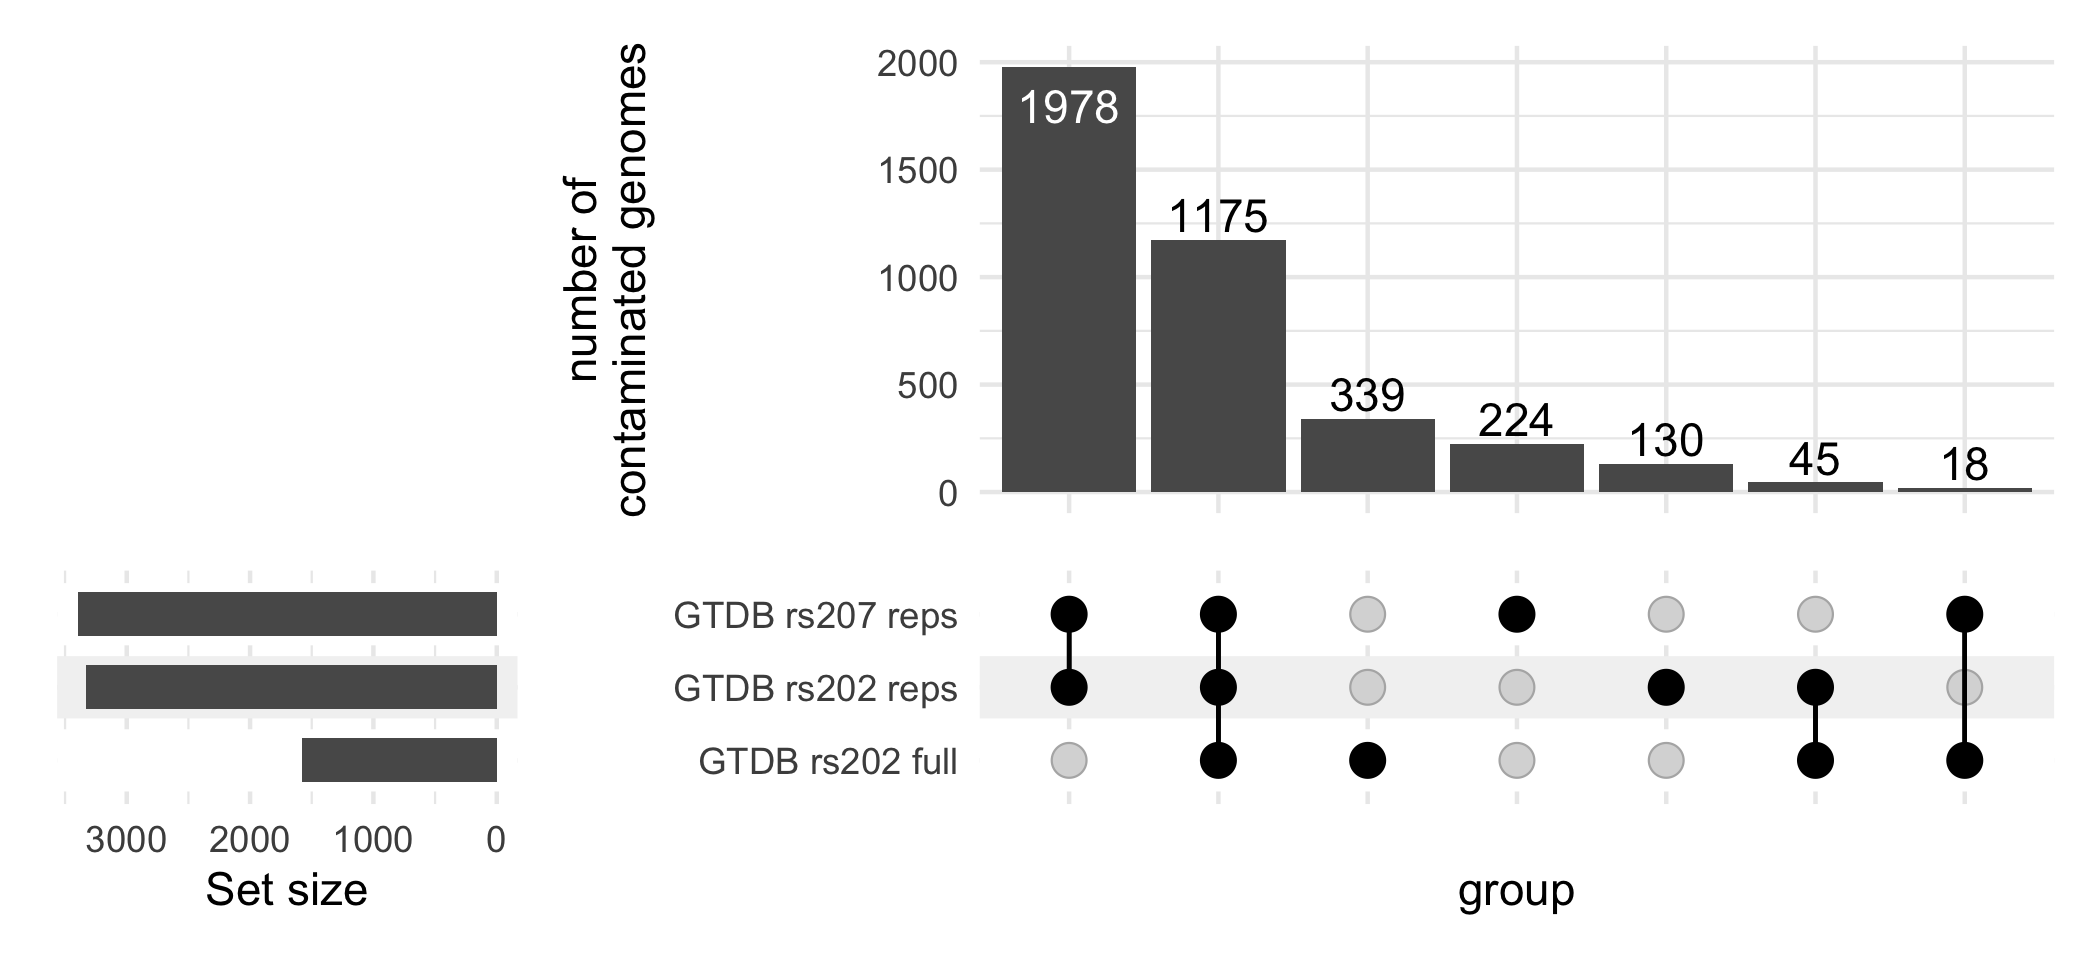

In [36]:
# change default figure size
options(repr.plot.width=7, repr.plot.height=3.2, repr.plot.res = 300)

dbs = c("GTDB rs202 full", "GTDB rs202 reps", "GTDB rs207 reps")
ComplexUpset::upset(contaminated_list, intersect = dbs, 
                    base_annotations = list('Intersection size'=(intersection_size() + 
                                                                 ylab('number of\ncontaminated genomes'))))

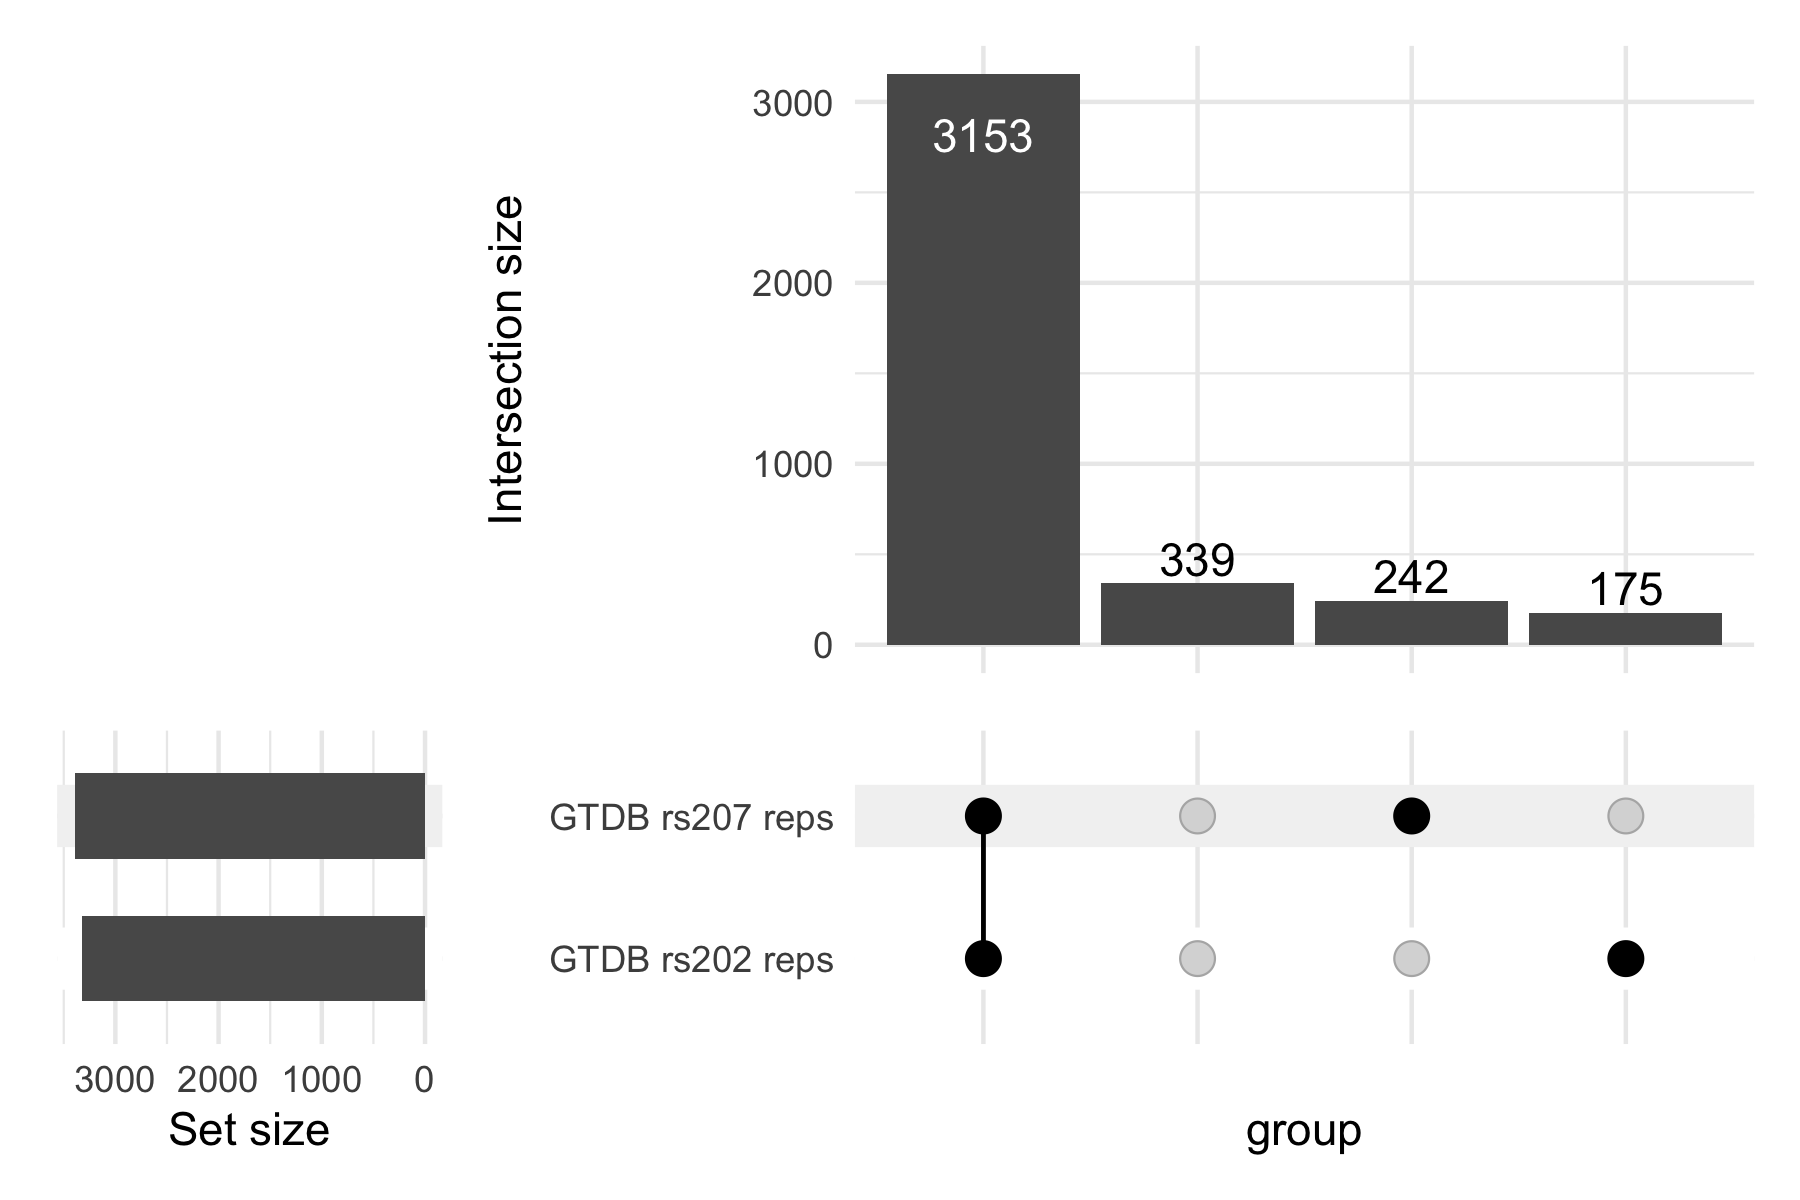

In [29]:
dbs = c("GTDB rs202 reps", "GTDB rs207 reps")
ComplexUpset::upset(contaminated_list, intersect = dbs)

In [63]:
noncontaminated_list <- UpSetR::fromList(list(rs202_full = filter(set1_rs202_full_combined, contaminated_at_filter_rank == F)$genome,
                                           rs202_reps = filter(set1_rs202_reps_combined, contaminated_at_filter_rank == F)$genome,
                                           rs207_reps = filter(set1_rs207_reps_combined, contaminated_at_filter_rank == F)$genome))
                 

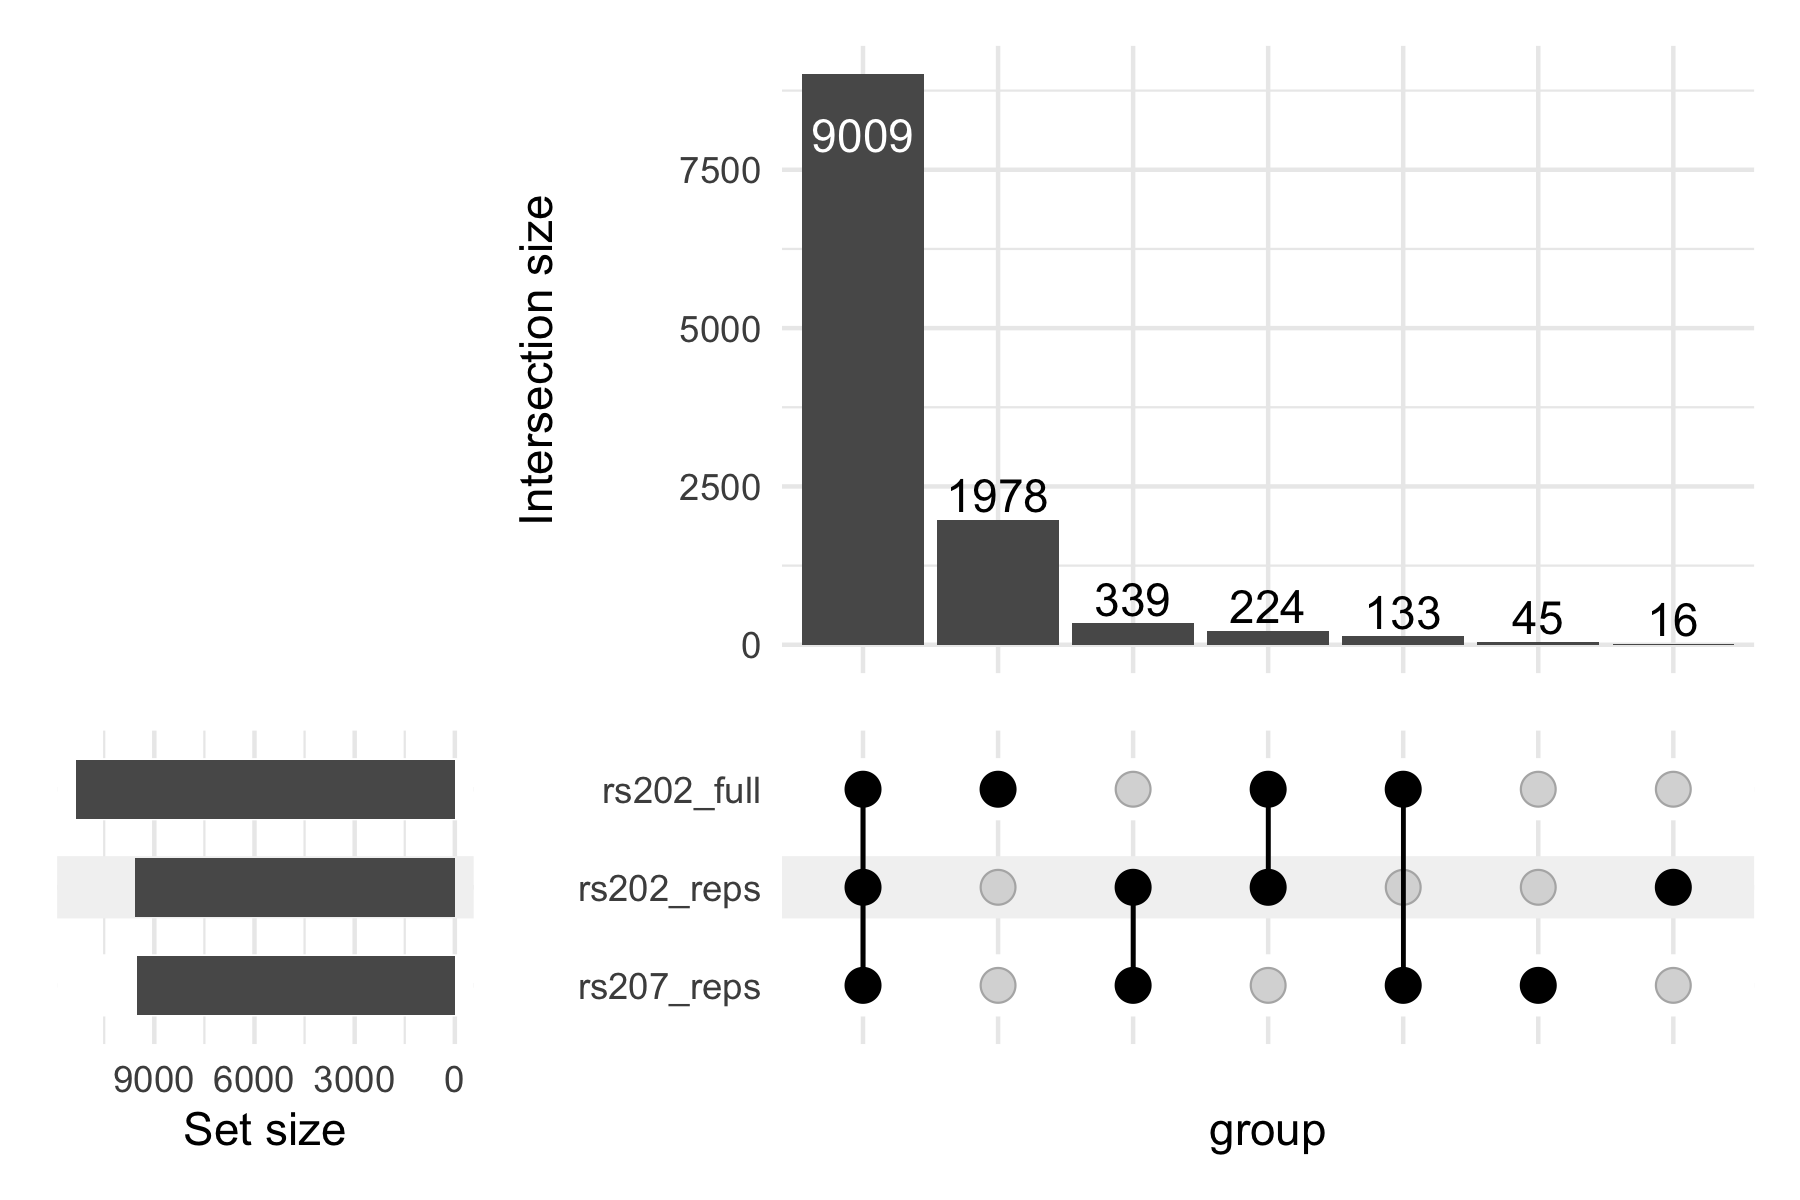

In [64]:
dbs = c("rs202_full", "rs202_reps", "rs207_reps")
ComplexUpset::upset(noncontaminated_list, intersect = dbs)